1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Setup Kaggle API Key

In [2]:
# Import the Kaggle API library
from kaggle.api.kaggle_api_extended import KaggleApi
# import os


# Initialize the Kaggle API
api = KaggleApi()

# os.environ["KAGGLE_CONFIG_DIR"] = "C:/Users/priya/Desktop/udacity project/cd0385-project-starter/project/.kaggle"
# Replace 'username' and 'key' with your Kaggle username and key from the kaggle.json file
api.authenticate()

# Download the dataset
api.competition_download_files("bike-sharing-demand", path="C:/Users/priya/Desktop/udacity project/cd0385-project-starter/project")

# Unzip the dataset
import zipfile

zip_file_path = "C:/Users/priya/Desktop/udacity project/cd0385-project-starter/project/bike-sharing-demand.zip"
destination_path = "C:/Users/priya/Desktop/udacity project/cd0385-project-starter/project"

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_path)


### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
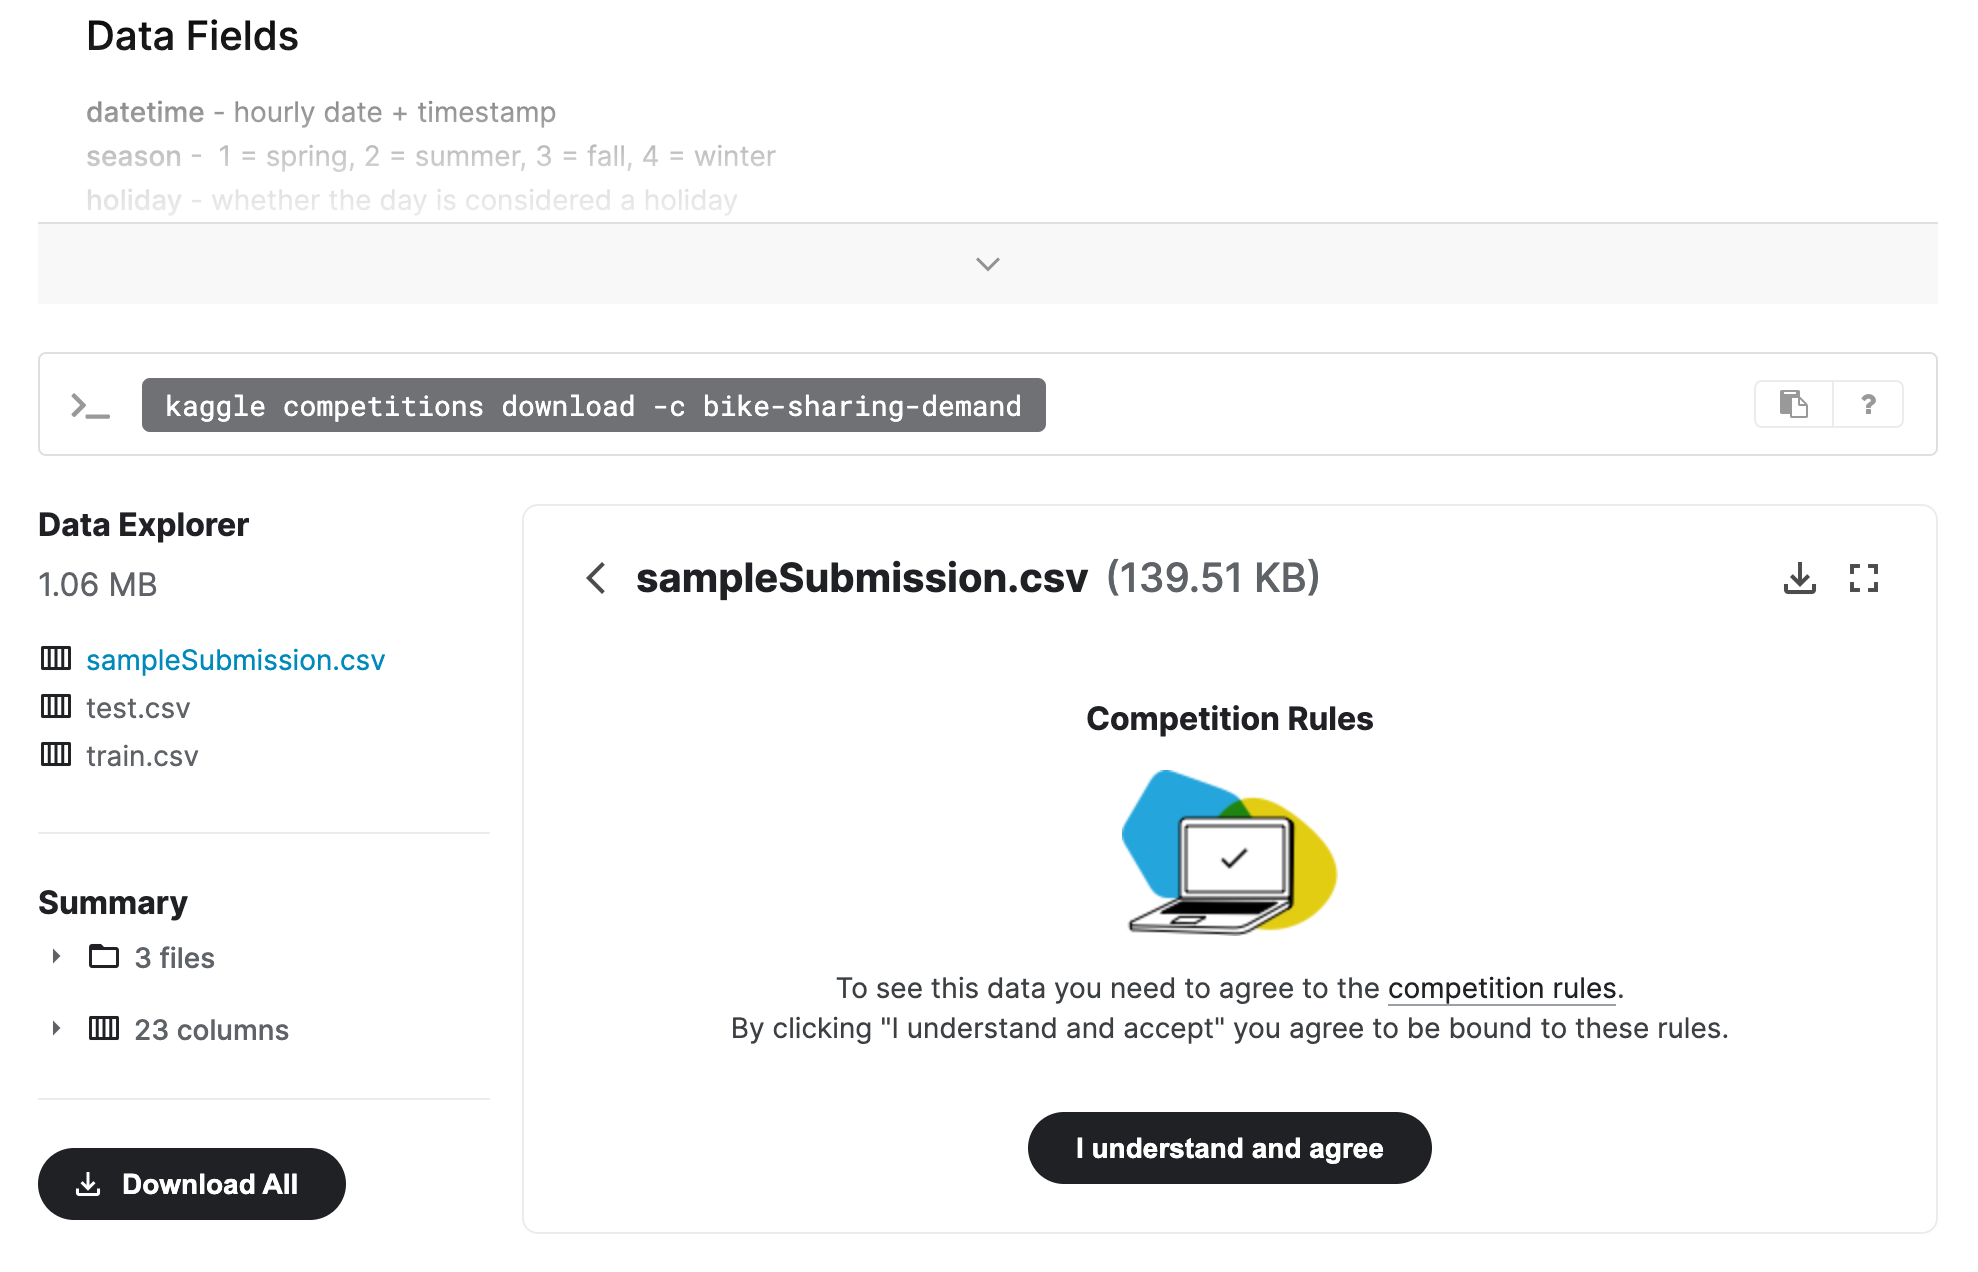

In [3]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [4]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
train = train.drop(columns=['casual', 'registered'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


In [6]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.

In [7]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv')
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [8]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv')
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [9]:
# hyperparameter_tune_kwargs = {
#     "searcher": "auto",
#     "scheduler": "local",
#     "num_trials": 10,
# }
predictor = TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit(train_data= train, time_limit=600, presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels\ag-20230808_195956\"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels\ag-20230808_195956\"
AutoGluon Version:  0.8.2
Python Version:     3.9.15
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
Disk Space Avail:   152.55 GB / 403.40 GB (37.8%)
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass'

### Review AutoGluon's training run with ranking of models that did the best.

In [10]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -50.460536       5.640793  334.916537                0.000000           0.233671            3       True         22
1   NeuralNetFastAI_BAG_L2  -51.605999       4.711313  255.224031                0.183400          18.357170            2       True         18
2   RandomForestMSE_BAG_L2  -53.505912       4.902070  242.178468                0.374157           5.311607            2       True         15
3     ExtraTreesMSE_BAG_L2  -54.070063       4.914688  238.125109                0.386775           1.258248            2       True         17
4           XGBoost_BAG_L2  -54.942779       4.582850  241.367176                0.054937           4.500314            2       True         19
5     LightGBMLarge_BAG_L2  -54.982779       4.666813  243.986660         

C:\Users\priya\miniconda3\envs\virtual1\lib\site-packages\autogluon\core\utils\plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFa

### Create predictions from test dataset

In [11]:
predictions = predictor.predict(test)
predictions.head()

0    26.368279
1    42.212601
2    46.975067
3    48.980301
4    51.520985
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [12]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.229210
std        88.497581
min         1.296712
25%        21.525045
50%        68.006706
75%       167.961670
max       350.224915
Name: count, dtype: float64

In [13]:
# How many negative values do we have?
(predictions<0).any()

False

In [14]:
# Set them to zero
predictions[predictions<0]=0

### Set predictions to submission dataframe, save, and submit

In [15]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [16]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

Successfully submitted to Bike Sharing Demand



  0%|          | 0.00/195k [00:00<?, ?B/s]
  4%|4         | 8.00k/195k [00:00<00:03, 50.2kB/s]
 58%|#####7    | 112k/195k [00:00<00:00, 516kB/s]  
 90%|######### | 176k/195k [00:00<00:00, 516kB/s]
100%|##########| 195k/195k [00:03<00:00, 63.2kB/s]


#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [17]:
!kaggle competitions submissions -c bike-sharing-demand

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission.csv               2023-08-08 20:07:10  first raw submission               complete  1.78411      1.78411       
submission.csv               2023-07-26 11:58:13  first raw submission               complete  1.78411      1.78411       
submission_new_hpo.csv       2023-07-25 10:03:42  new features with hyperparameters  complete  0.48355      0.48355       
submission_new_features.csv  2023-07-25 09:58:11  new features                       complete  0.92951      0.92951       
submission.csv               2023-07-25 09:23:08  first raw submission               complete  1.78411      1.78411       
submission_new_hpo.csv       2023-07-25 09:05:43  new features with hyperparameters  complete  1.83624      1.83624       
submission_new_h

#### Initial score of 1.78411

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<AxesSubplot: title={'center': 'season'}>,
        <AxesSubplot: title={'center': 'holiday'}>,
        <AxesSubplot: title={'center': 'workingday'}>],
       [<AxesSubplot: title={'center': 'weather'}>,
        <AxesSubplot: title={'center': 'temp'}>,
        <AxesSubplot: title={'center': 'atemp'}>],
       [<AxesSubplot: title={'center': 'humidity'}>,
        <AxesSubplot: title={'center': 'windspeed'}>,
        <AxesSubplot: title={'center': 'count'}>]], dtype=object)

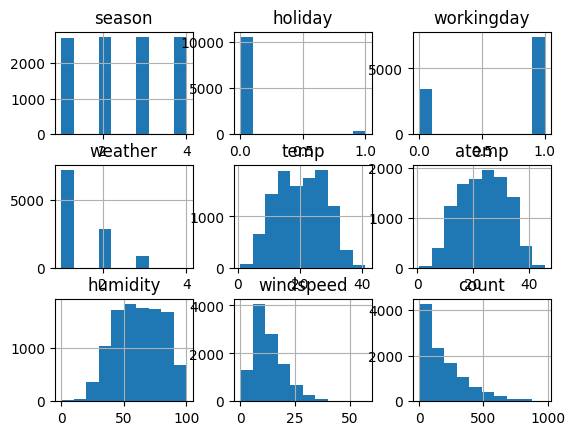

In [18]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist()

In [19]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,129


In [20]:
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(6)
memory usage: 850.6 KB


In [23]:
# create a new feature
#time
time = train['datetime'].dt.time
train['time'] = time


time = test['datetime'].dt.time
test['time'] = time

#day
day = train['datetime'].dt.day
train['day'] = day

day = test['datetime'].dt.day
test['day'] = day

#month
month = train['datetime'].dt.month
train['month'] = month

month = test['datetime'].dt.month
test['month'] = month

#year
year = train['datetime'].dt.year
train['year'] = year

year = test['datetime'].dt.year
test['year'] = year

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   count       10886 non-null  int64         
 10  time        10886 non-null  object        
 11  day         10886 non-null  int64         
 12  month       10886 non-null  int64         
 13  year        10886 non-null  int64         
dtypes: category(3), datetime64[ns](1), float64(3), int64(6), object(1)
memory usage: 968.1+ KB


In [25]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,time,day,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16,00:00:00,1,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40,01:00:00,1,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32,02:00:00,1,1,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13,03:00:00,1,1,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,04:00:00,1,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336,19:00:00,19,12,2012
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241,20:00:00,19,12,2012
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168,21:00:00,19,12,2012
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,129,22:00:00,19,12,2012


In [26]:
train['day_name'] = train['datetime'].dt.strftime('%A')
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,time,day,month,year,day_name
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16,00:00:00,1,1,2011,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40,01:00:00,1,1,2011,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32,02:00:00,1,1,2011,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13,03:00:00,1,1,2011,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,04:00:00,1,1,2011,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336,19:00:00,19,12,2012,Wednesday
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241,20:00:00,19,12,2012,Wednesday
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168,21:00:00,19,12,2012,Wednesday
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,129,22:00:00,19,12,2012,Wednesday


In [27]:
# train = train.drop(columns=['datetime'])

In [28]:
train = train.drop(columns=['day'])
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,time,month,year,day_name
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16,00:00:00,1,2011,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40,01:00:00,1,2011,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32,02:00:00,1,2011,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13,03:00:00,1,2011,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,04:00:00,1,2011,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336,19:00:00,12,2012,Wednesday
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241,20:00:00,12,2012,Wednesday
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168,21:00:00,12,2012,Wednesday
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,129,22:00:00,12,2012,Wednesday


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [29]:
train["season"] = train['season'].astype('category')
train["weather"] = train['weather'].astype('category')
train["workingday"] = train['workingday'].astype('category')
test["season"] = test['season'].astype('category')
test["weather"] = test['weather'].astype('category')
test["workingday"] = test['workingday'].astype('category')


In [30]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,time,month,year,day_name
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,00:00:00,1,2011,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,01:00:00,1,2011,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,02:00:00,1,2011,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,03:00:00,1,2011,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,04:00:00,1,2011,Saturday


array([[<AxesSubplot: title={'center': 'datetime'}>,
        <AxesSubplot: title={'center': 'holiday'}>,
        <AxesSubplot: title={'center': 'temp'}>],
       [<AxesSubplot: title={'center': 'atemp'}>,
        <AxesSubplot: title={'center': 'humidity'}>,
        <AxesSubplot: title={'center': 'windspeed'}>],
       [<AxesSubplot: title={'center': 'count'}>,
        <AxesSubplot: title={'center': 'month'}>,
        <AxesSubplot: title={'center': 'year'}>]], dtype=object)

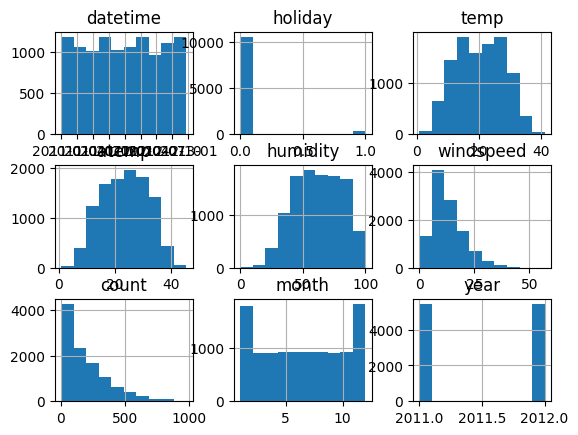

In [31]:
# View histogram of all features again now with the hour feature
train.hist()

## Step 5: Rerun the model with the same settings as before, just with more features

In [32]:

predictor_new_features = TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit(train_data=train,time_limit=600,presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels\ag-20230808_201228\"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels\ag-20230808_201228\"
AutoGluon Version:  0.8.2
Python Version:     3.9.15
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
Disk Space Avail:   148.11 GB / 403.40 GB (36.7%)
Train Data Rows:    10886
Train Data Columns: 13
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass

In [33]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -27.724236       4.772276  410.719079                0.000000           0.208332            3       True         20
1   NeuralNetFastAI_BAG_L2  -27.738280       4.606277  407.427575                0.288334          21.815756            2       True         18
2          LightGBM_BAG_L2  -30.410461       4.483942  388.694991                0.165998           3.083172            2       True         14
3          CatBoost_BAG_L2  -30.465469       4.394188  528.737021                0.076244         143.125202            2       True         16
4        LightGBMXT_BAG_L2  -30.577082       4.624667  389.358848                0.306724           3.747029            2       True         13
5           XGBoost_BAG_L2  -31.450945       4.468997  392.032030         

C:\Users\priya\miniconda3\envs\virtual1\lib\site-packages\autogluon\core\utils\plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFa

In [34]:
test['day_name'] = test['datetime'].dt.strftime('%A')

In [35]:
# Remember to set all negative values to zero
predictions_new=predictor_new_features.predict(test)
predictions_new[predictions_new<0]=0
predictions_new

0        21.157845
1        15.688910
2        17.165287
3        17.426508
4        14.438534
           ...    
6488    233.724701
6489    185.703079
6490    159.917038
6491    128.404724
6492    101.219048
Name: count, Length: 6493, dtype: float32

In [36]:
# Same submitting predictions
submission_new_features = submission
submission_new_features["count"] = predictions_new
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [37]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

Successfully submitted to Bike Sharing Demand



  0%|          | 0.00/194k [00:00<?, ?B/s]
  4%|4         | 8.00k/194k [00:00<00:05, 37.8kB/s]
 54%|#####3    | 104k/194k [00:00<00:00, 373kB/s]  
 78%|#######8  | 152k/194k [00:00<00:00, 378kB/s]
100%|##########| 194k/194k [00:00<00:00, 383kB/s]
100%|##########| 194k/194k [00:03<00:00, 53.9kB/s]


In [38]:
!kaggle competitions submissions -c bike-sharing-demand

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2023-08-08 20:22:42  new features                       complete  0.99719      0.99719       
submission.csv               2023-08-08 20:07:10  first raw submission               complete  1.78411      1.78411       
submission.csv               2023-07-26 11:58:13  first raw submission               complete  1.78411      1.78411       
submission_new_hpo.csv       2023-07-25 10:03:42  new features with hyperparameters  complete  0.48355      0.48355       
submission_new_features.csv  2023-07-25 09:58:11  new features                       complete  0.92951      0.92951       
submission.csv               2023-07-25 09:23:08  first raw submission               complete  1.78411      1.78411       
submission_new_h

#### New Score of 0.99719

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [39]:
train = train.drop(columns = ['datetime'])

In [41]:
import autogluon.core as ag

In [56]:
hyperparameters = {
    'GBM' : {'num_leaves' : ag.space.Int(5, 100),
             'min_data_in_leaf' : ag.space.Int(5, 500),
             'num_threads' : 3},
    'RF' : {'n_estimators' : ag.space.Int(125, 150),
            'min_samples_split' : ag.space.Int(2, 10),
            'min_samples_leaf' : ag.space.Int(5, 500),
            'n_jobs' : -2},
    'XGB' : {}
                    }

hyperparameter_tune_kwargs = {
    "searcher": "auto",
    "scheduler": "local",
    "num_trials": 10,
}
predictor_new_hpo = TabularPredictor(label='count', eval_metric = 'root_mean_squared_error').fit(train_data = train, time_limit=800, hyperparameters=hyperparameters, hyperparameter_tune_kwargs = hyperparameter_tune_kwargs)

No path specified. Models will be saved in: "AutogluonModels\ag-20230808_204953\"
Beginning AutoGluon training ... Time limit = 800s
AutoGluon will save models to "AutogluonModels\ag-20230808_204953\"
AutoGluon Version:  0.8.2
Python Version:     3.9.15
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
Disk Space Avail:   145.54 GB / 403.40 GB (36.1%)
Train Data Rows:    10886
Train Data Columns: 12
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memor

  0%|          | 0/10 [00:00<?, ?it/s]

[1000]	valid_set's rmse: 44.2112
[2000]	valid_set's rmse: 42.6984
[3000]	valid_set's rmse: 42.1011
[4000]	valid_set's rmse: 41.7298
[5000]	valid_set's rmse: 41.6077
[6000]	valid_set's rmse: 41.4932
[7000]	valid_set's rmse: 41.4846
[8000]	valid_set's rmse: 41.2919
[9000]	valid_set's rmse: 41.2371
[10000]	valid_set's rmse: 41.1896
[1000]	valid_set's rmse: 40.9968
[1000]	valid_set's rmse: 40.7704
[1000]	valid_set's rmse: 56.1792
[2000]	valid_set's rmse: 47.3534
[3000]	valid_set's rmse: 45.1031
[4000]	valid_set's rmse: 43.6027
[5000]	valid_set's rmse: 42.7032
[6000]	valid_set's rmse: 42.3167
[7000]	valid_set's rmse: 41.8292
[8000]	valid_set's rmse: 41.5031
[9000]	valid_set's rmse: 41.2919
[10000]	valid_set's rmse: 41.0206
[1000]	valid_set's rmse: 40.9448
[1000]	valid_set's rmse: 41.3928
[2000]	valid_set's rmse: 40.5412
[3000]	valid_set's rmse: 40.4755
[1000]	valid_set's rmse: 40.5665
[1000]	valid_set's rmse: 42.4576
[2000]	valid_set's rmse: 40.7275
[3000]	valid_set's rmse: 40.3976
[4000]	v

Fitted model: LightGBM\T1 ...
	-41.1721	 = Validation score   (-root_mean_squared_error)
	2.22s	 = Training   runtime
	0.3s	 = Validation runtime
Fitted model: LightGBM\T2 ...
	-40.9424	 = Validation score   (-root_mean_squared_error)
	0.89s	 = Training   runtime
	0.07s	 = Validation runtime
Fitted model: LightGBM\T3 ...
	-40.7536	 = Validation score   (-root_mean_squared_error)
	1.05s	 = Training   runtime
	0.1s	 = Validation runtime
Fitted model: LightGBM\T4 ...
	-41.0203	 = Validation score   (-root_mean_squared_error)
	5.1s	 = Training   runtime
	0.93s	 = Validation runtime
Fitted model: LightGBM\T5 ...
	-40.5979	 = Validation score   (-root_mean_squared_error)
	0.52s	 = Training   runtime
	0.03s	 = Validation runtime
Fitted model: LightGBM\T6 ...
	-40.9153	 = Validation score   (-root_mean_squared_error)
	0.52s	 = Training   runtime
	0.03s	 = Validation runtime
Fitted model: LightGBM\T7 ...
	-40.4371	 = Validation score   (-root_mean_squared_error)
	2.57s	 = Training   runtime
	0.

  0%|          | 0/10 [00:00<?, ?it/s]

Fitted model: RandomForest\T1 ...
	-44.4658	 = Validation score   (-root_mean_squared_error)
	0.25s	 = Training   runtime
	0.09s	 = Validation runtime
Fitted model: RandomForest\T2 ...
	-102.2501	 = Validation score   (-root_mean_squared_error)
	0.17s	 = Training   runtime
	0.06s	 = Validation runtime
Fitted model: RandomForest\T3 ...
	-113.6596	 = Validation score   (-root_mean_squared_error)
	0.2s	 = Training   runtime
	0.07s	 = Validation runtime
Fitted model: RandomForest\T4 ...
	-51.8295	 = Validation score   (-root_mean_squared_error)
	0.24s	 = Training   runtime
	0.09s	 = Validation runtime
Fitted model: RandomForest\T5 ...
	-106.4085	 = Validation score   (-root_mean_squared_error)
	0.21s	 = Training   runtime
	0.09s	 = Validation runtime
Fitted model: RandomForest\T6 ...
	-83.4931	 = Validation score   (-root_mean_squared_error)
	0.22s	 = Training   runtime
	0.1s	 = Validation runtime
Fitted model: RandomForest\T7 ...
	-120.4312	 = Validation score   (-root_mean_squared_error)

  0%|          | 0/10 [00:00<?, ?it/s]

Fitted model: XGBoost\T1 ...
	-44.6794	 = Validation score   (-root_mean_squared_error)
	2.05s	 = Training   runtime
	0.06s	 = Validation runtime
Fitted model: XGBoost\T2 ...
	-43.3467	 = Validation score   (-root_mean_squared_error)
	3.08s	 = Training   runtime
	0.08s	 = Validation runtime
Fitted model: XGBoost\T3 ...
	-43.5997	 = Validation score   (-root_mean_squared_error)
	6.45s	 = Training   runtime
	0.24s	 = Validation runtime
Fitted model: XGBoost\T4 ...
	-44.8097	 = Validation score   (-root_mean_squared_error)
	7.26s	 = Training   runtime
	0.13s	 = Validation runtime
Fitted model: XGBoost\T5 ...
	-45.2703	 = Validation score   (-root_mean_squared_error)
	2.8s	 = Training   runtime
	0.09s	 = Validation runtime
Fitted model: XGBoost\T6 ...
	-45.2835	 = Validation score   (-root_mean_squared_error)
	10.54s	 = Training   runtime
	0.16s	 = Validation runtime
Fitted model: XGBoost\T7 ...
	-44.4327	 = Validation score   (-root_mean_squared_error)
	12.75s	 = Training   runtime
	0.33s

In [57]:
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,time,day,month,year,day_name
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,00:00:00,20,1,2011,Thursday
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,01:00:00,20,1,2011,Thursday
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,02:00:00,20,1,2011,Thursday
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,03:00:00,20,1,2011,Thursday
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,04:00:00,20,1,2011,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,19:00:00,31,12,2012,Monday
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,20:00:00,31,12,2012,Monday
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,21:00:00,31,12,2012,Monday
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,22:00:00,31,12,2012,Monday


In [58]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model   score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2  -39.386483       0.936500  18.226673                0.000000           0.288431            2       True         31
1          LightGBM\T10  -40.361616       0.252953   3.166345                0.252953           3.166345            1       True         10
2           LightGBM\T7  -40.437094       0.212739   2.574454                0.212739           2.574454            1       True          7
3           LightGBM\T9  -40.471602       0.091415   0.995773                0.091415           0.995773            1       True          9
4           LightGBM\T5  -40.597936       0.028785   0.524189                0.028785           0.524189            1       True          5
5           LightGBM\T3  -40.753613       0.095292   1.049127                0.095292           1.

C:\Users\priya\miniconda3\envs\virtual1\lib\site-packages\autogluon\core\utils\plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM\\T1': 'LGBModel',
  'LightGBM\\T2': 'LGBModel',
  'LightGBM\\T3': 'LGBModel',
  'LightGBM\\T4': 'LGBModel',
  'LightGBM\\T5': 'LGBModel',
  'LightGBM\\T6': 'LGBModel',
  'LightGBM\\T7': 'LGBModel',
  'LightGBM\\T8': 'LGBModel',
  'LightGBM\\T9': 'LGBModel',
  'LightGBM\\T10': 'LGBModel',
  'RandomForest\\T1': 'RFModel',
  'RandomForest\\T2': 'RFModel',
  'RandomForest\\T3': 'RFModel',
  'RandomForest\\T4': 'RFModel',
  'RandomForest\\T5': 'RFModel',
  'RandomForest\\T6': 'RFModel',
  'RandomForest\\T7': 'RFModel',
  'RandomForest\\T8': 'RFModel',
  'RandomForest\\T9': 'RFModel',
  'RandomForest\\T10': 'RFModel',
  'XGBoost\\T1': 'XGBoostModel',
  'XGBoost\\T2': 'XGBoostModel',
  'XGBoost\\T3': 'XGBoostModel',
  'XGBoost\\T4': 'XGBoostModel',
  'XGBoost\\T5': 'XGBoostModel',
  'XGBoost\\T6': 'XGBoostModel',
  'XGBoost\\T7': 'XGBoostModel',
  'XGBoost\\T8': 'XGBoostModel',
  'XGBoost\\T9': 'XGBoostModel',
  'XGBoost\\T10': 'XGBoostModel',
  'WeightedEnsemble_L2

In [59]:
# Remember to set all negative values to zero
predcitions_new_hpo = predictor_new_hpo.predict(test)

In [60]:
(predcitions_new_hpo<0).any()

True

In [61]:
predcitions_new_hpo[predcitions_new_hpo<0] = 0

In [62]:
predcitions_new_hpo.describe()

count    6493.000000
mean      190.165558
std       173.360687
min         0.000000
25%        45.155788
50%       148.903229
75%       283.028046
max       939.621460
Name: count, dtype: float64

In [63]:
# Same submitting predictions
submission_new_hpo = submission
submission_new_hpo["count"] = predcitions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [64]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

Successfully submitted to Bike Sharing Demand



  0%|          | 0.00/194k [00:00<?, ?B/s]
  4%|4         | 8.00k/194k [00:00<00:03, 53.8kB/s]
 54%|#####3    | 104k/194k [00:00<00:00, 492kB/s]  
 87%|########6 | 168k/194k [00:00<00:00, 500kB/s]
100%|##########| 194k/194k [00:04<00:00, 46.1kB/s]


In [65]:
!kaggle competitions submissions -c bike-sharing-demand

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-08-08 20:51:37  new features with hyperparameters  complete  0.59231      0.59231       
submission_new_hpo.csv       2023-08-08 20:30:19  new features with hyperparameters  complete  0.59726      0.59726       
submission_new_features.csv  2023-08-08 20:22:42  new features                       complete  0.99719      0.99719       
submission.csv               2023-08-08 20:07:10  first raw submission               complete  1.78411      1.78411       
submission.csv               2023-07-26 11:58:13  first raw submission               complete  1.78411      1.78411       
submission_new_hpo.csv       2023-07-25 10:03:42  new features with hyperparameters  complete  0.48355      0.48355       
submission_new_f

#### New Score of 0.59231

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

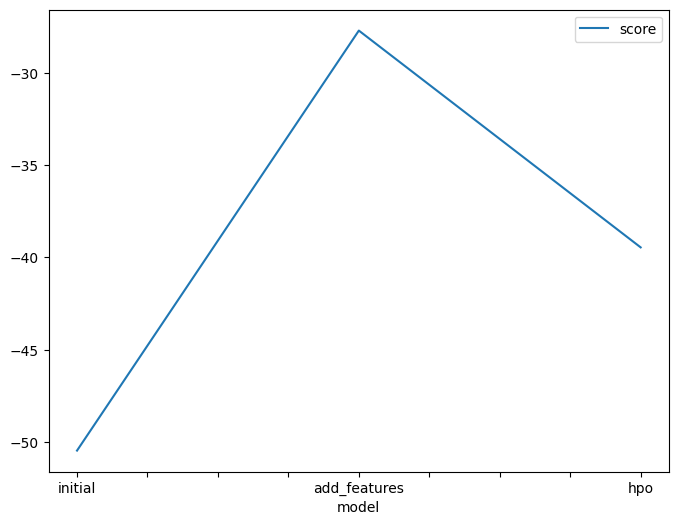

In [52]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [
            predictor.leaderboard(silent=True)['score_val'][0],
            predictor_new_features.leaderboard(silent=True)['score_val'][0],
            predictor_new_hpo.leaderboard(silent=True)['score_val'][0]]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

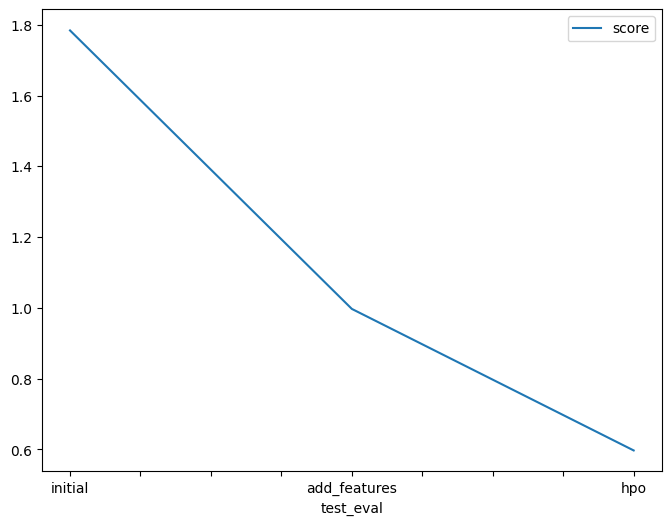

In [53]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.78411, 0.99719, 0.59726]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [67]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "GBM": [-54.982779, -30.410461, -40.3616],
    "RF": [-53.505912, -32.441176, -62.850821],
    "XGB": [-54.94277, -31.450945 , -43.972327],
    "score": [1.78411, 0.99719, 0.59231]
})

,model,GBM,RF,XGB,score
0,initial,-54.982779,-53.505912,-54.942770,1.78411
1,add_features,-30.410461,-32.441176,-31.450945,0.99719
2,hpo,-40.361600,-62.850821,-43.972327,0.59231
